In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv('data/Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [5]:
x = data.iloc[:, :2]
y = data.iloc[:, 2]
l_encoder = LabelEncoder()
s_scaler = OneHotEncoder(sparse=False)
x['Position'] = l_encoder.fit_transform(x['Position'])
x['Position'] = s_scaler.fit_transform(x['Position'].values.reshape(-1, 1))
x

,Position,Level
0,1.0,1
1,0.0,2
2,0.0,3
3,0.0,4
4,0.0,5
5,0.0,6
6,0.0,7
7,0.0,8
8,0.0,9
9,0.0,10


In [7]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x['Level'].reshape(-1, 1), y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [12]:
x_grid = np.arange(
    start=min(x['Level']),
    stop=max(x['Level']),
    step=0.01
)
x_grid = x_grid.reshape(-1, 1)

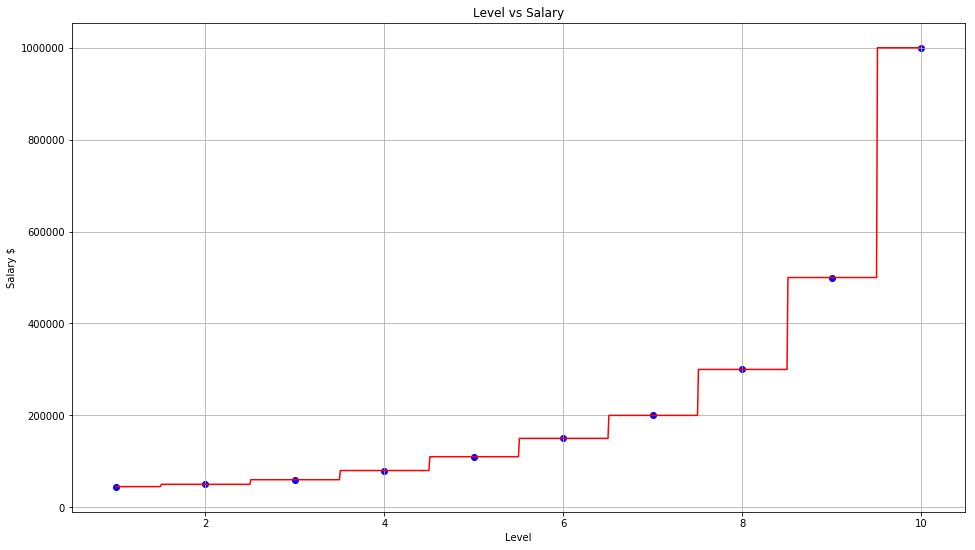

In [15]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x_grid, regressor.predict(x_grid), c='r')
ax.scatter(x['Level'], y, c='b')
ax.set_xlabel('Level')
ax.set_ylabel('Salary $')
ax.set_title('Level vs Salary')
ax.grid()

fig.s